In [111]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import statsmodels.api as sm
import itertools
import warnings
import seaborn as sns
#from fbprophet import Prophet


warnings.filterwarnings("ignore")
orders=pd.read_excel('Superstore.xls',sheet_name='Orders')
returns=pd.read_excel('Superstore.xls',sheet_name='Returns')
people=pd.read_excel('Superstore.xls',sheet_name='People')
Ords_Ret=pd.merge(orders,returns,how='outer').sort_values('Order Date')
Ords_Ret=Ords_Ret[["Category","Sales",'Order Date','Returned']]

# The Averagesales

In [74]:
Ords_Ret.groupby('Category').mean()

,Sales
Category,
Furniture,349.834887
Office Supplies,119.324101
Technology,452.709276


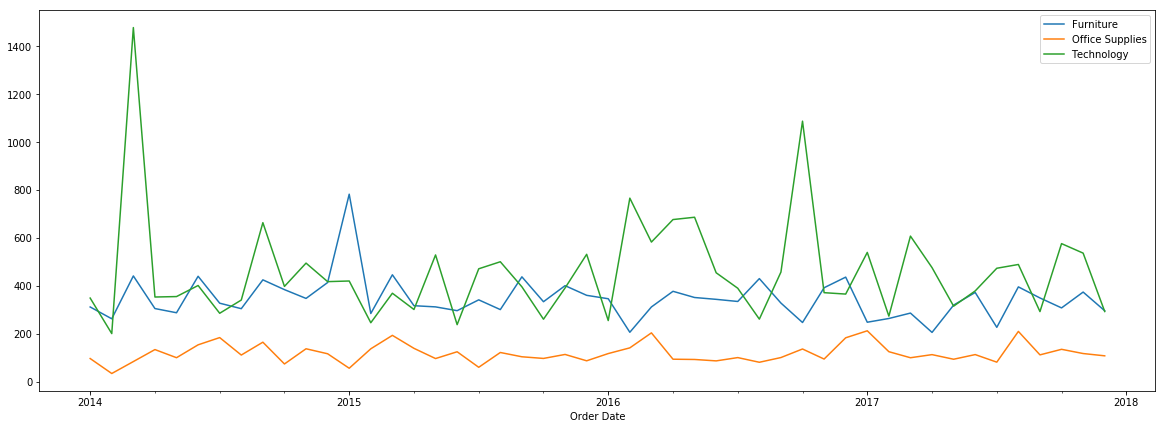

In [75]:
df=Ords_Ret.set_index('Order Date').groupby('Category').resample('M').mean().unstack(0)['Sales']
df.columns.name=''
df.plot(figsize=(20,7))
plt.show()

In [76]:
furniture= df.Furniture
office = df['Office Supplies']
technology = df.Technology

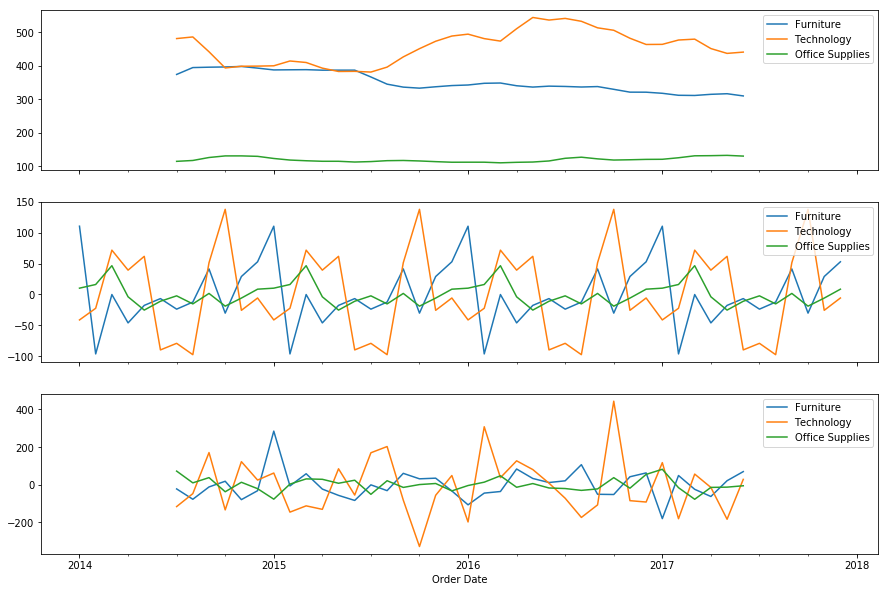

In [81]:
def Compute_decomposition(dfs):
    results=[]
    for i in range(len(dfs)):
        decomposition = sm.tsa.seasonal_decompose(dfs[i], model='additive')
        results.append(decomposition)
    return results

def Plot_decomposition(dfs):
    results=Compute_decomposition(dfs)
    fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,10),sharex=True)
    for i in range(len(results)):
        results[i].trend.plot(ax=ax1)
        results[i].seasonal.plot(ax=ax2)
        results[i].resid.plot(ax=ax3)
    #ax1.set_yscale("log")
    ax1.legend()
    ax2.legend()
    ax3.legend()
    #fig.suptitle('Additive Decomposition Model for {}'.format(title))
    plt.show()

Plot_decomposition([furniture,technology,office])

In [84]:
orders['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

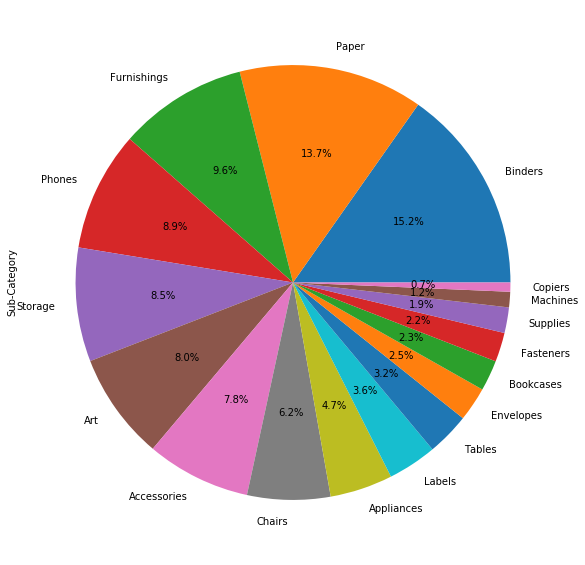

In [89]:
plt.figure(figsize=(12,10))
orders['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

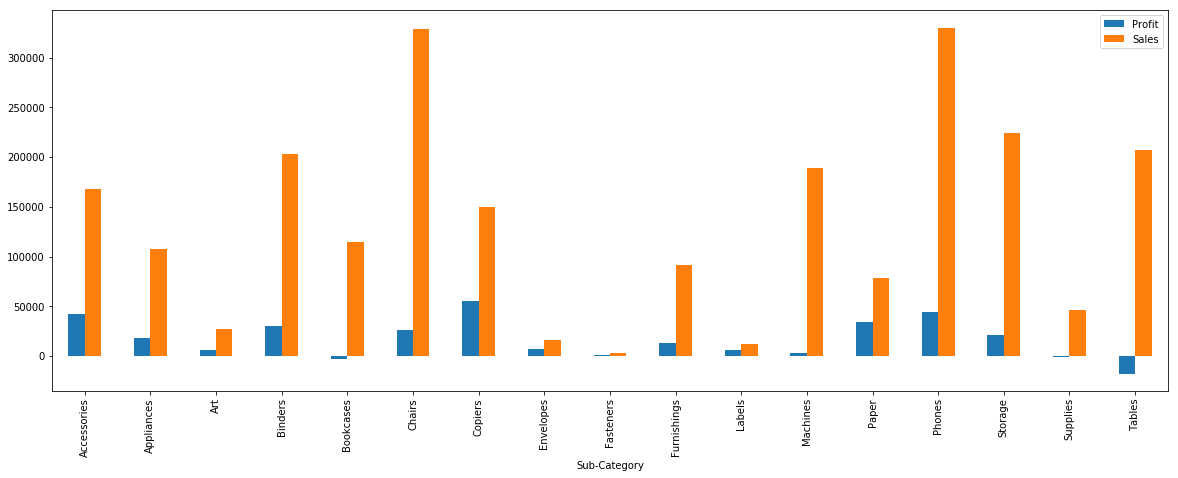

In [112]:
tmp=orders.groupby('Sub-Category')['Profit','Sales'].agg(['sum'])
tmp.columns=tmp.columns.droplevel(1)
tmp.plot.bar(figsize=(20,7))

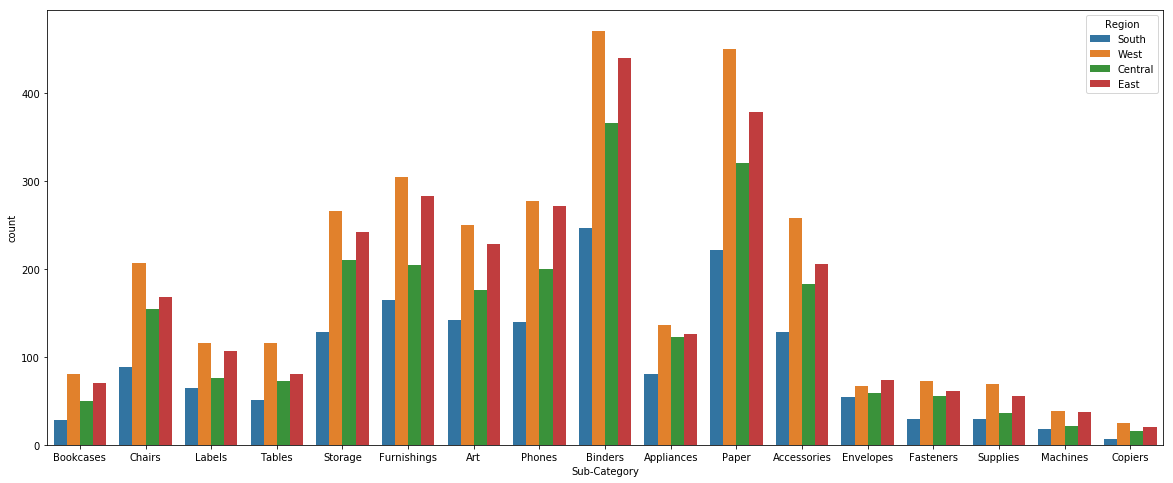

In [115]:
plt.figure(figsize=(20,8))
sns.countplot(x="Sub-Category", hue="Region", data=orders)
plt.show()

In [117]:
orders['Cost']=orders['Sales']-orders['Profit']
orders['Profit %']=(orders['Profit']/orders['Cost'])*100

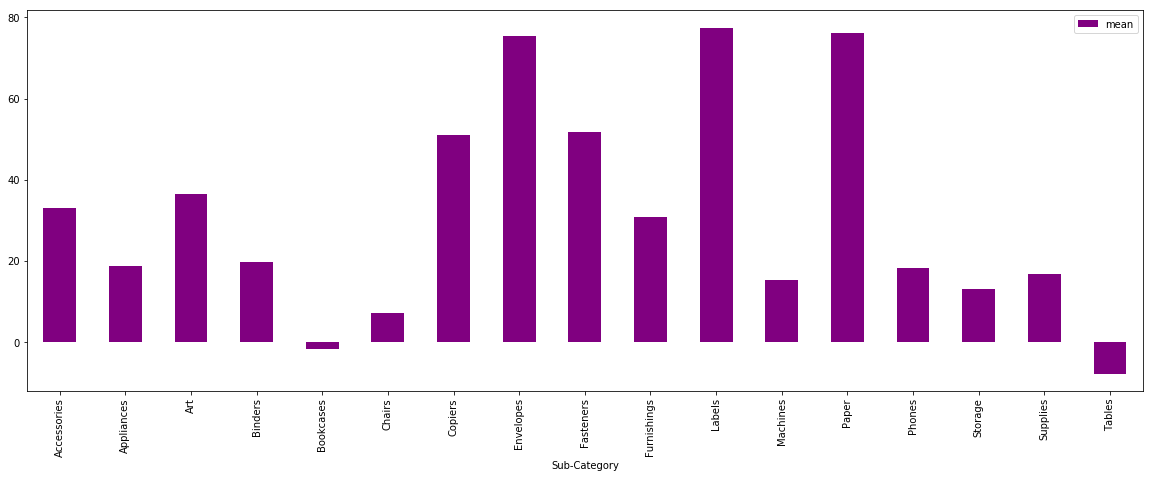

In [133]:
tmp=orders.groupby('Sub-Category')['Profit %'].agg(['mean'])
#tmp.columns=tmp.columns.droplevel(1)
tmp.plot.bar(figsize=(20,7),color="purple")
plt.show()

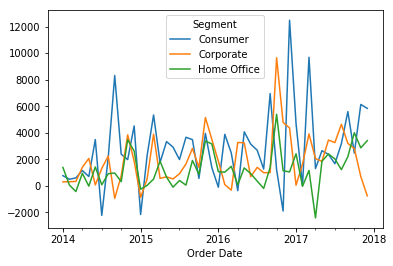

In [147]:
orders.set_index("Order Date").groupby("Segment").resample("M").sum()[["Profit","Cost"]].unstack(0)["Profit"].plot()

In [172]:
import matplotlib.dates as mdates

In [178]:
tmp.index.year

Int64Index([2014, 2015, 2016, 2017], dtype='int64', name='Order Date')

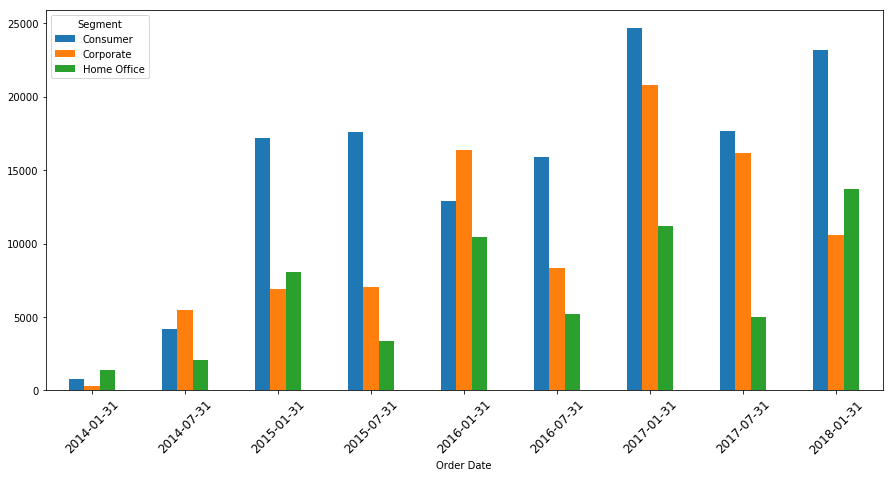

In [186]:
tmp=orders.set_index("Order Date").groupby("Segment").resample("6M").sum()[["Profit","Cost"]].unstack(0)["Profit"]
fig, ax = plt.subplots(figsize=(15,7))
tmp.plot.bar(ax=ax)
ax.set_xticklabels(tmp.index.date, fontsize=12)
ax.xaxis.set_tick_params(rotation=45)
plt.show()

In [238]:
orders["Customer Name"].count()

9994

In [247]:
orders.set_index("Order Date").groupby(["Customer Name","Segment"]).sum().sort_values(by=["Profit","Sales"],ascending = False).head(600)["Sales"].sum()/orders["Sales"].sum() *100

81.29583907417275

In [258]:
names=orders.set_index("Order Date").groupby(["Customer Name","Segment"]).sum().sort_values(by=["Profit","Sales"],ascending = False).head(600).index.get_level_values(0).values
orders.loc[orders["Customer Name"].isin(names)].set_index("Order Date").groupby(["Segment"]).resample("Y").sum()["Profit %"]

Segment      Order Date
Consumer     2014-12-31    26301.239796
             2015-12-31    30998.905750
             2016-12-31    39847.612154
             2017-12-31    46451.285888
Corporate    2014-12-31    18200.021537
             2015-12-31    17242.546429
             2016-12-31    19504.815047
             2017-12-31    29021.174649
Home Office  2014-12-31    10665.590491
             2015-12-31    11153.924178
             2016-12-31    14763.603074
             2017-12-31    18626.946522
Name: Profit %, dtype: float64

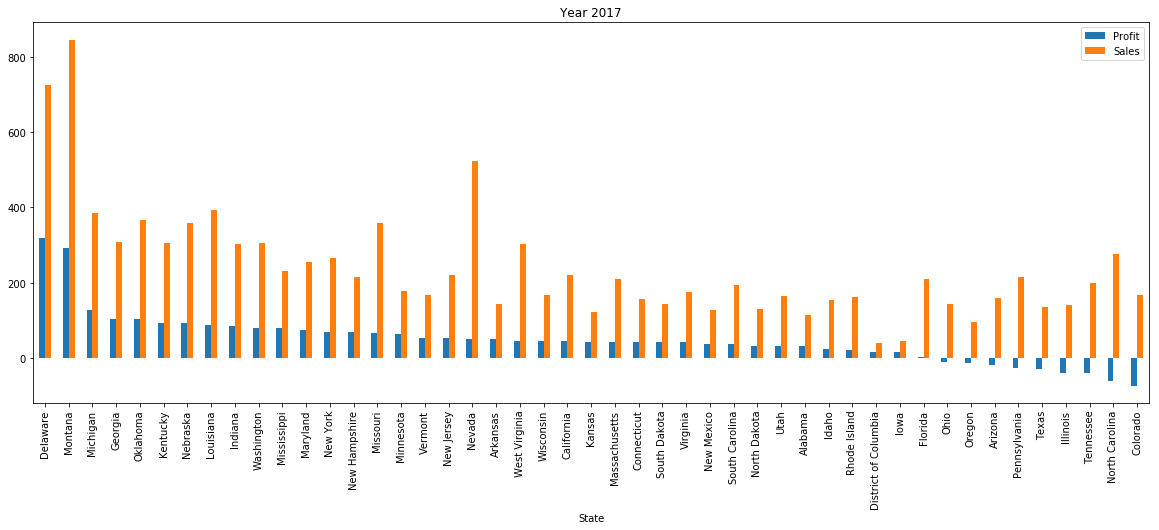

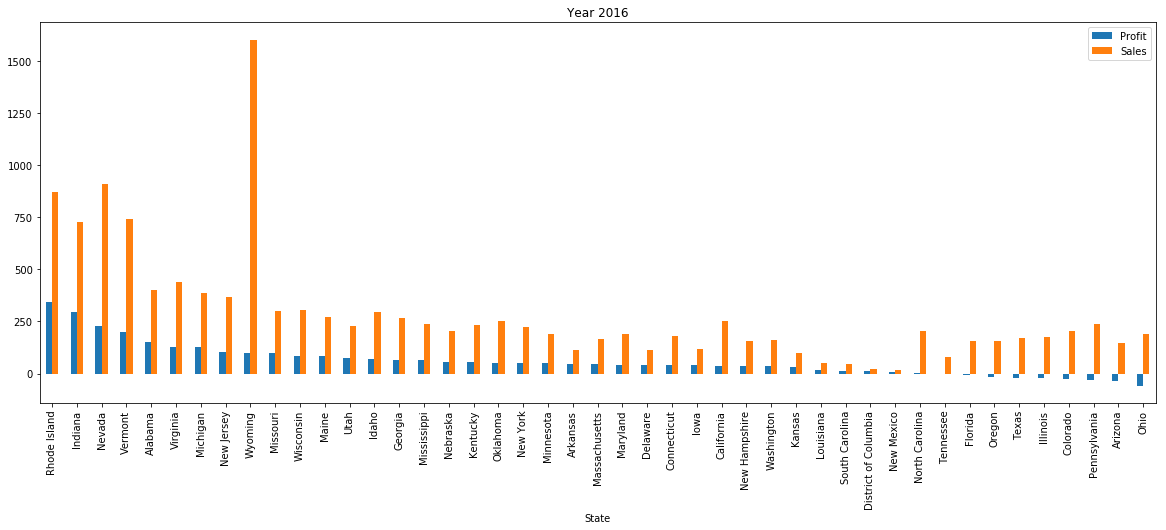

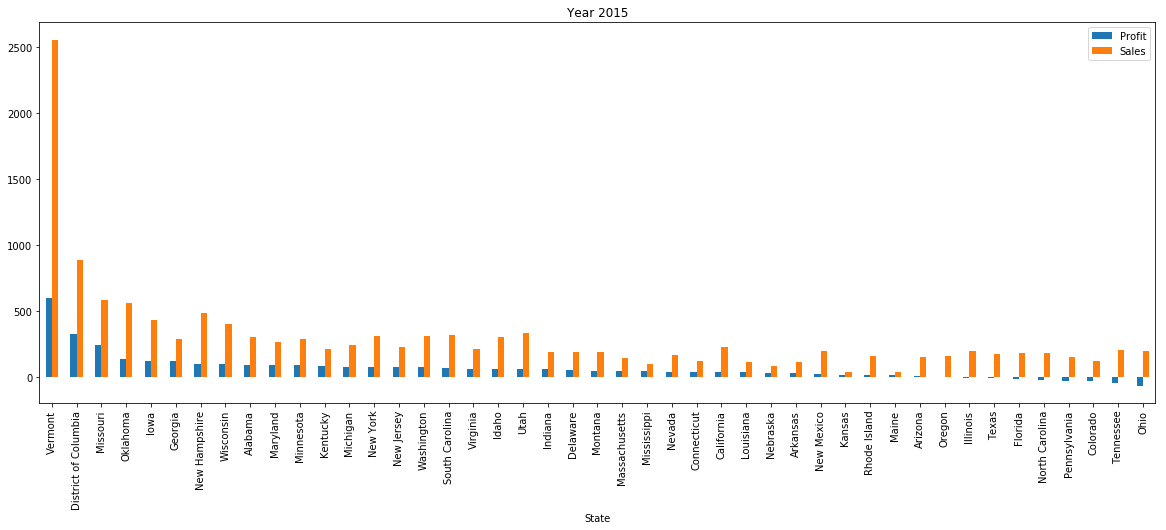

In [282]:
orders[orders["Order Date"].dt.year==2017].groupby("State").mean().sort_values(by=["Profit"],ascending = False)[["Profit","Sales"]].plot.bar(figsize=(20,7),title="Year 2017")
orders[orders["Order Date"].dt.year==2016].groupby("State").mean().sort_values(by=["Profit"],ascending = False)[["Profit","Sales"]].plot.bar(figsize=(20,7),title="Year 2016")
orders[orders["Order Date"].dt.year==2015].groupby("State").mean().sort_values(by=["Profit"],ascending = False)[["Profit","Sales"]].plot.bar(figsize=(20,7),title="Year 2015")


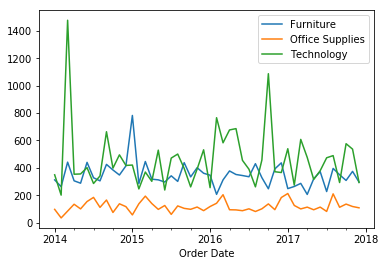

In [285]:
df.plot()

In [ ]:
from fbprophet import Prophet

furniture=df.reset_index()[['Order Date', 'Furniture']]
furniture = furniture.rename(columns={'Order Date': 'ds', 'Furniture': 'y'})


furniture_forecast = furniture_model.make_future_dataframe(periods=6, freq='M')
furniture_forecast = furniture_model.predict(furniture_forecast)
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.show()


furniture_model.plot_components(furniture_forecast)
plt.show()

In [ ]:
def get_prophet